In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the x_train.npy file with allow_pickle=True
x_train = np.load('x_train.npy', allow_pickle=True).reshape(-1,784)

# Load the corresponding labels file
labels = np.load('y_train.npy', allow_pickle=True)

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Initialize a dictionary to store indices of samples for each class
class_indices = {class_name: [] for class_name in class_names}

# Populate the class_indices dictionary
for i, label in enumerate(labels):
    # print(i ,label)
    class_indices[class_names[label]].append(i)
print(len(class_indices['0']))
# Visualize 5 samples from each class

5923


In [2]:
x =[]
for value in class_indices.values():
    for i in range(100):
        x.append(x_train[value[i]])
x = np.array(x)
print(x.shape)
print(x[0])

(1000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 18

In [3]:
mene = np.mean(x, axis=0)
print(mene.shape)
print(mene[0])

(784,)
0.0


In [4]:
import numpy as np
# Step 1: Remove the mean from the data matrix X
X_centered = x - mene
# print(X_centered.shape)
# print(X_centered)
# Step 1: Compute the transpose of the centralized data matrix X
X_transpose = X_centered.T

# Step 2: Multiply the centralized data matrix X by its transpose
covariance_matrix = np.dot(X_centered, X_transpose)

# Step 3: Divide the result by the number of samples minus 1
covariance_matrix /= (x.shape[0] - 1)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort the eigenvectors based on eigenvalues
print(eigenvalues)
print
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Create matrix U using sorted eigenvectors
U = sorted_eigenvectors
# print(U.shape)
# print(U)
# covariance_matrix now contains the covariance matrix S


[ 3.25397540e+05+0.00000000e+00j  2.49858471e+05+0.00000000e+00j
  2.32605223e+05+0.00000000e+00j  1.82617981e+05+0.00000000e+00j
  1.63961047e+05+0.00000000e+00j  1.53428703e+05+0.00000000e+00j
  1.17308517e+05+0.00000000e+00j  1.01838292e+05+0.00000000e+00j
  9.40697083e+04+0.00000000e+00j  7.22957224e+04+0.00000000e+00j
  6.82388081e+04+0.00000000e+00j  6.40218462e+04+0.00000000e+00j
  6.13525108e+04+0.00000000e+00j  5.76362399e+04+0.00000000e+00j
  5.49587733e+04+0.00000000e+00j  5.07269765e+04+0.00000000e+00j
  4.36369312e+04+0.00000000e+00j  4.26897722e+04+0.00000000e+00j
  4.17198836e+04+0.00000000e+00j  3.90678395e+04+0.00000000e+00j
  3.62272238e+04+0.00000000e+00j  3.39374682e+04+0.00000000e+00j
  3.23841827e+04+0.00000000e+00j  3.18395886e+04+0.00000000e+00j
  3.02226933e+04+0.00000000e+00j  2.86811977e+04+0.00000000e+00j
  2.67046373e+04+0.00000000e+00j  2.57410519e+04+0.00000000e+00j
  2.43001656e+04+0.00000000e+00j  2.30691190e+04+0.00000000e+00j
  2.29040024e+04+0.000000

In [5]:
Y = np.dot(U.T, X_centered)
recontrucrt_x = np.dot(U, Y)
# print(recontrucrt_x[0])
mse = ((X_centered- recontrucrt_x) ** 2).mean(axis=None)
print("tis is te MSE" , int(mse))

tis is te MSE 0


C:\Users\dell\AppData\Local\Temp\ipykernel_26452\328322248.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  print("tis is te MSE" , int(mse))


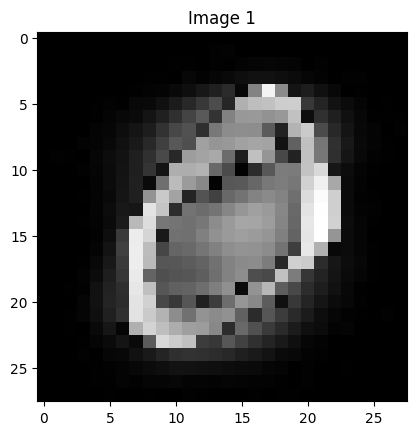

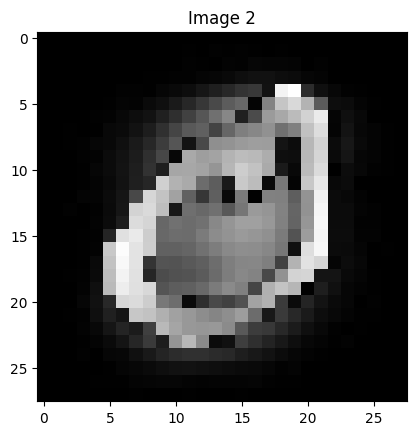

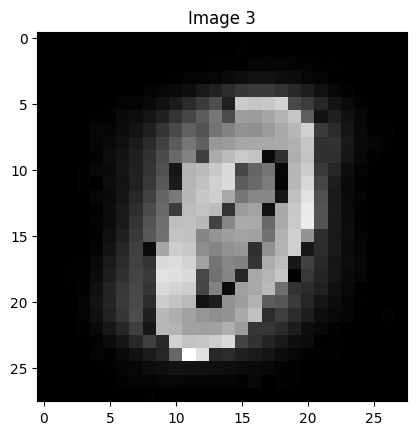

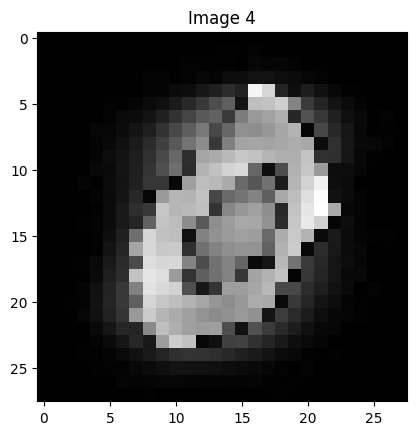

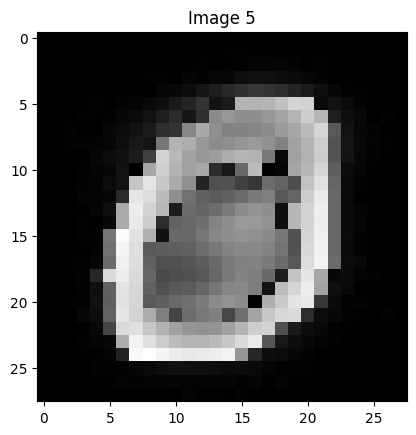

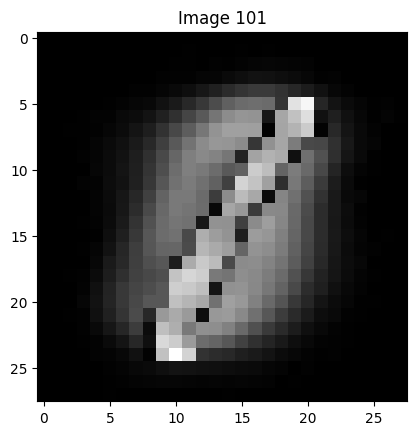

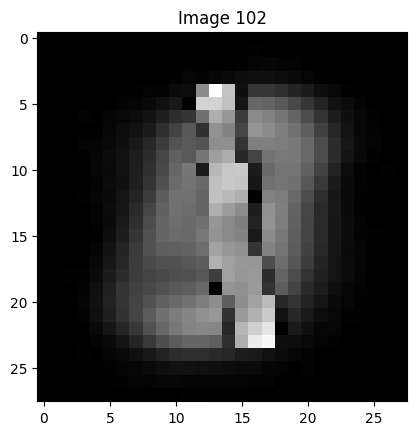

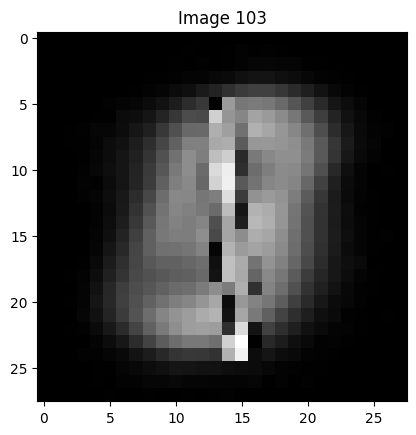

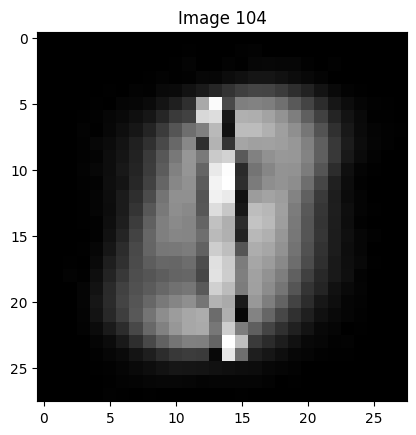

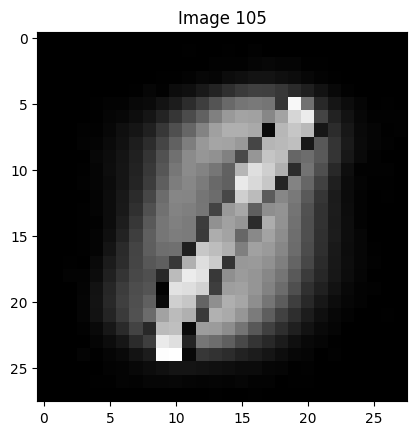

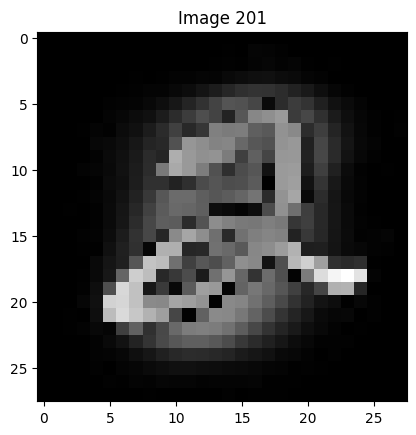

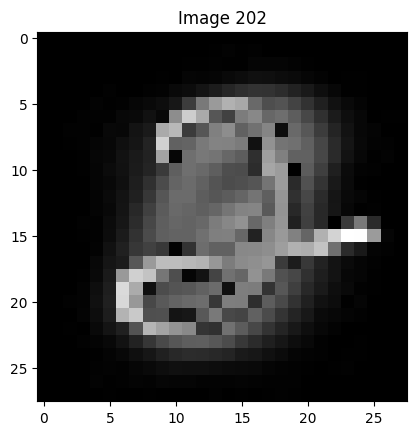

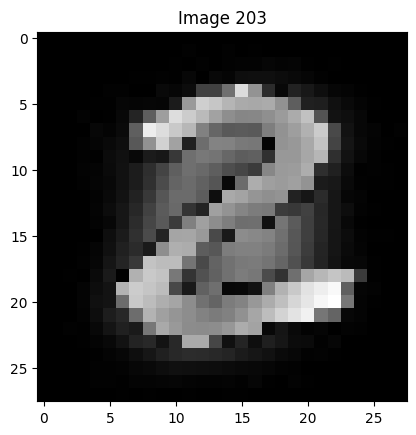

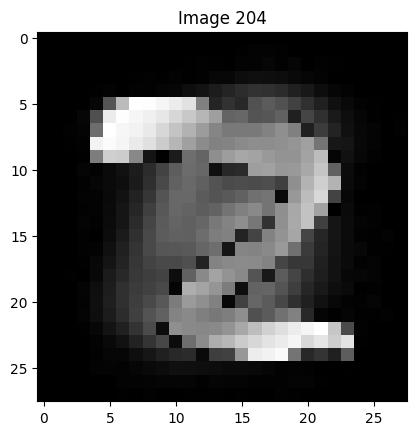

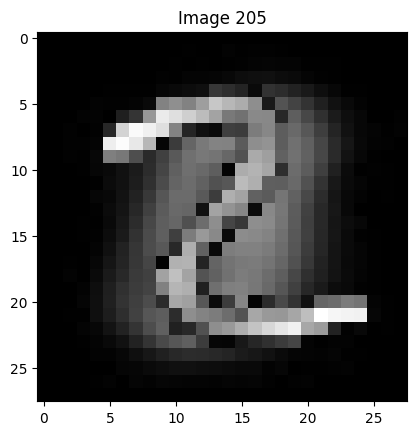

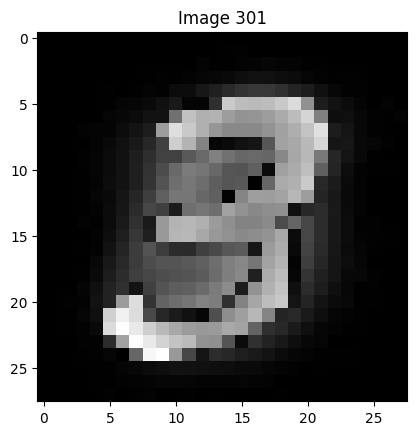

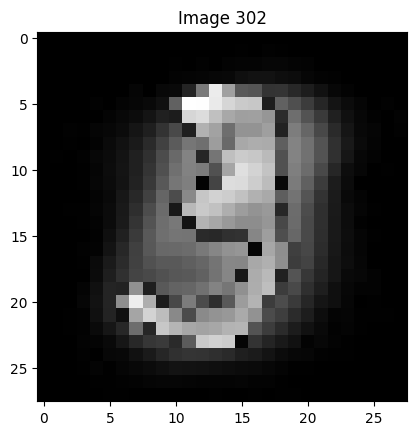

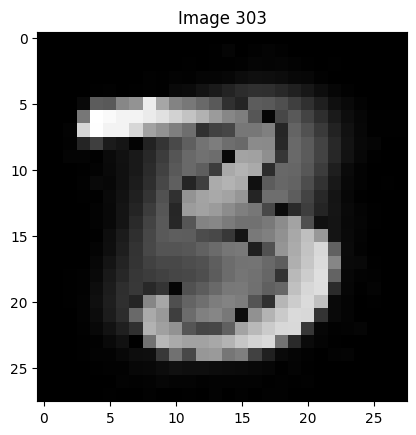

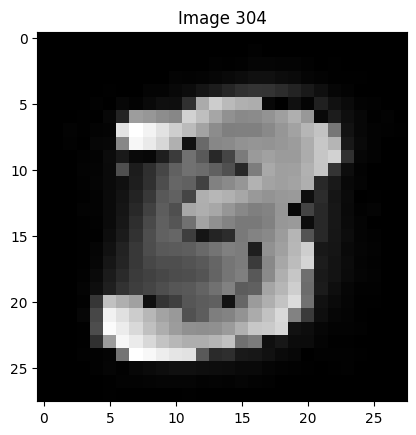

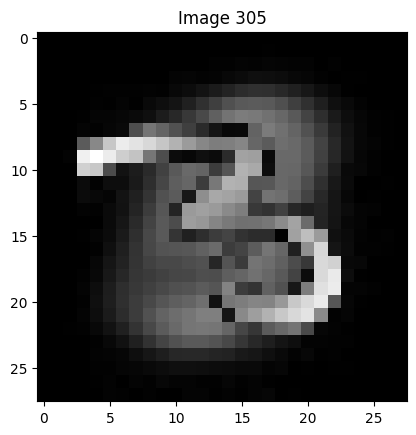

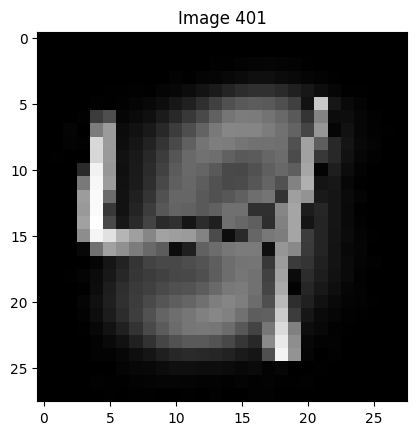

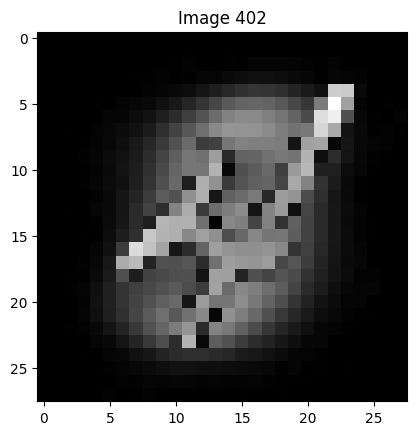

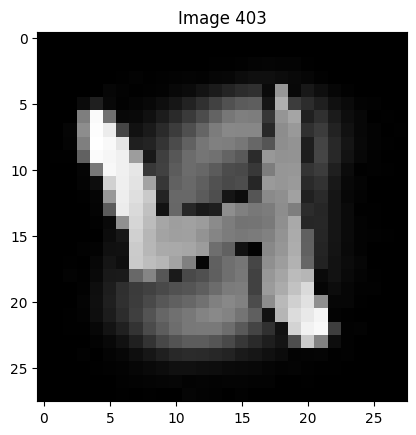

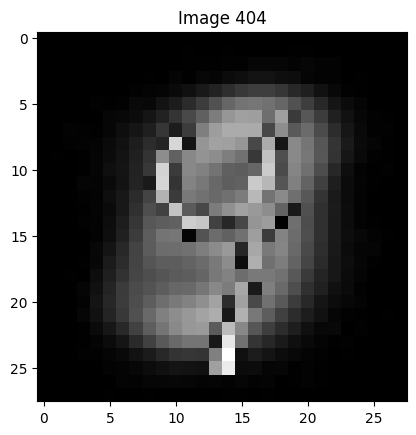

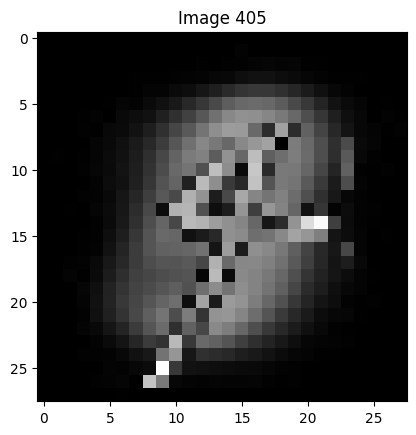

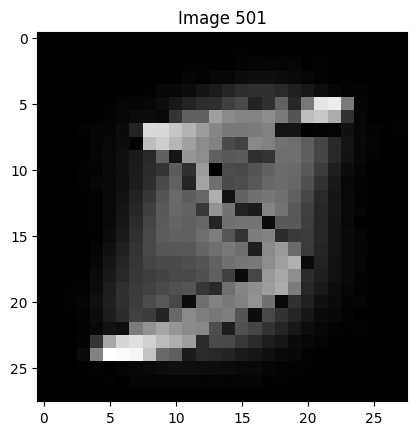

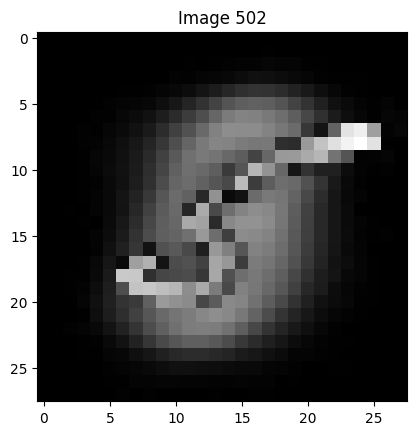

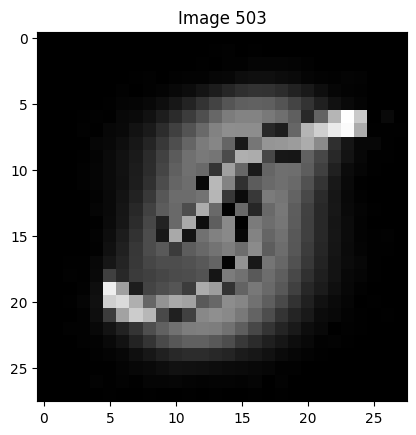

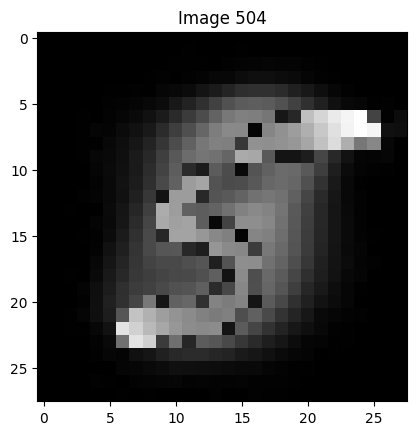

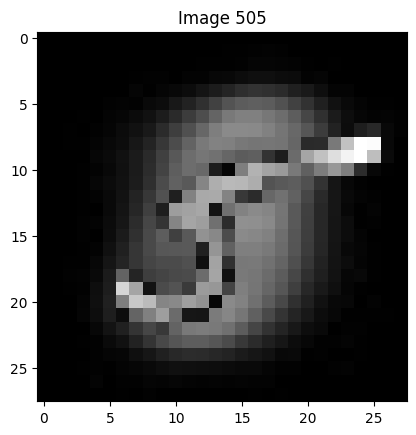

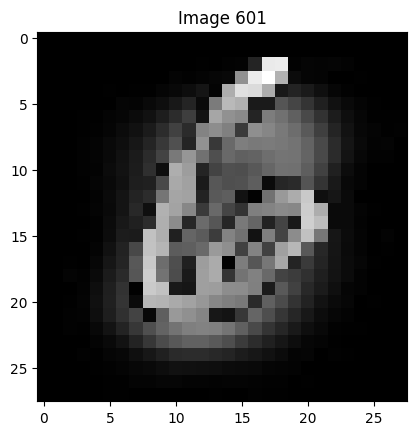

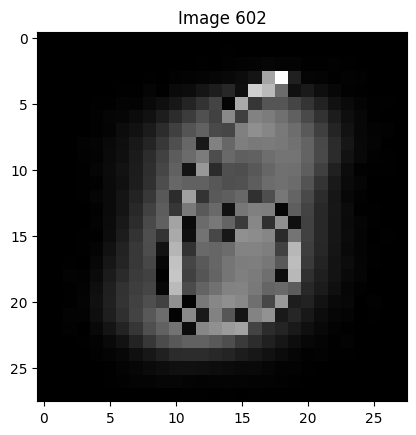

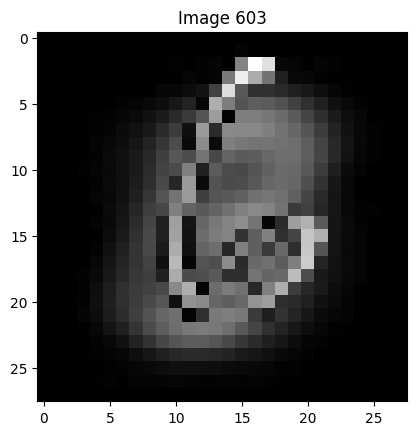

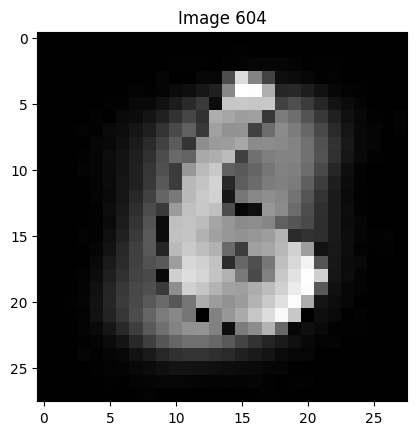

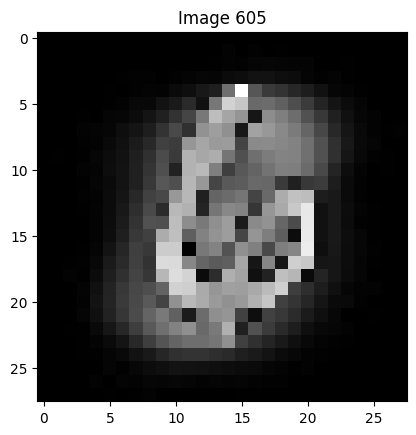

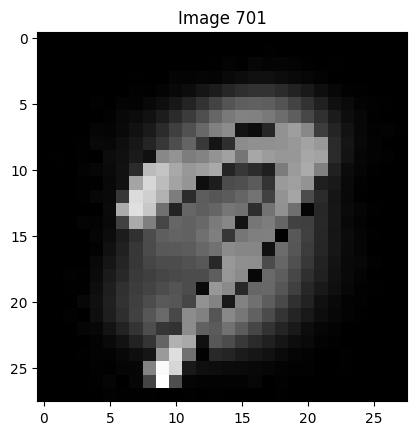

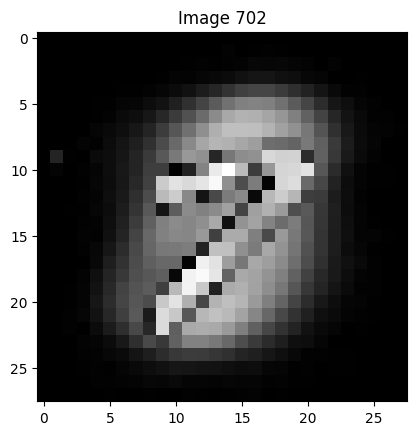

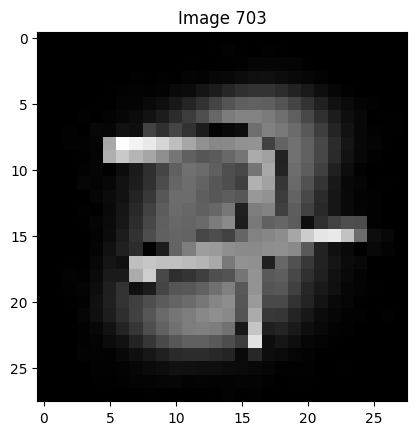

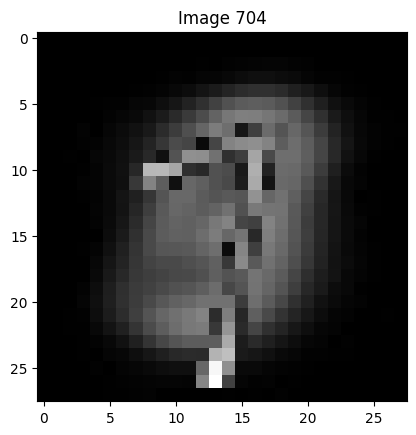

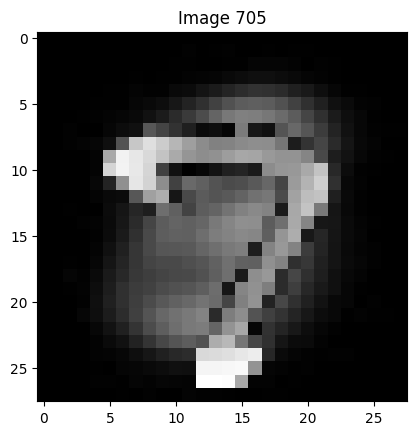

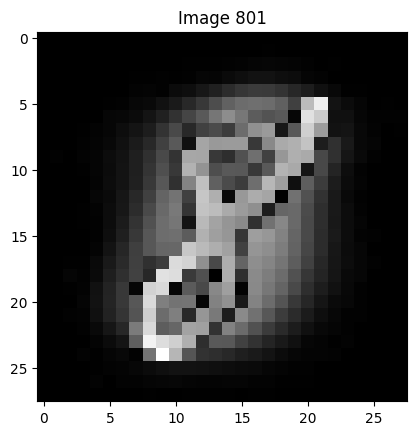

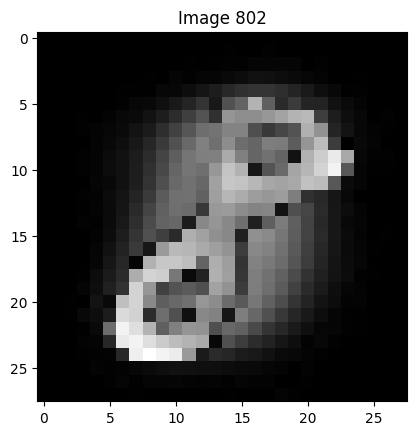

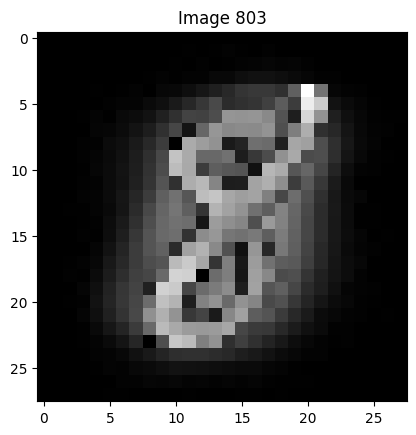

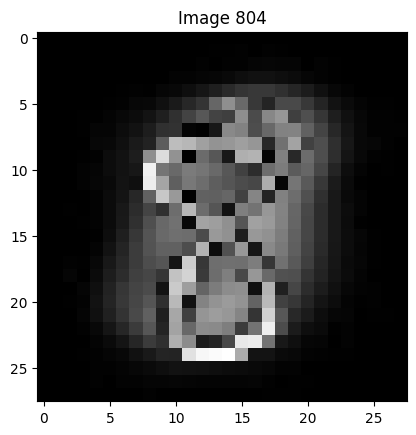

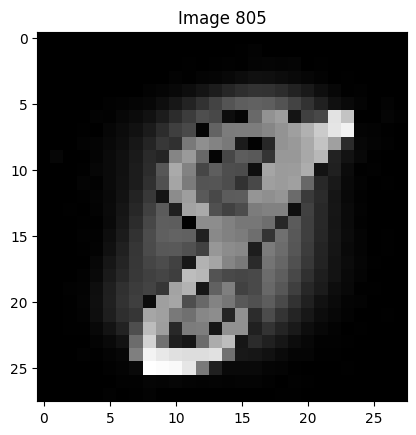

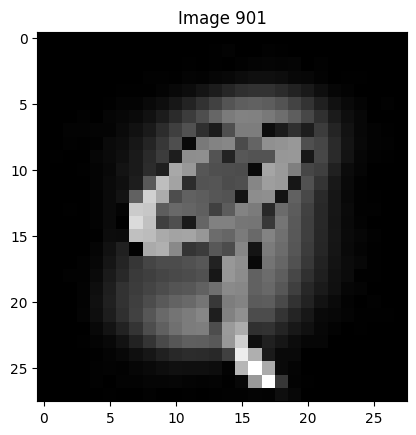

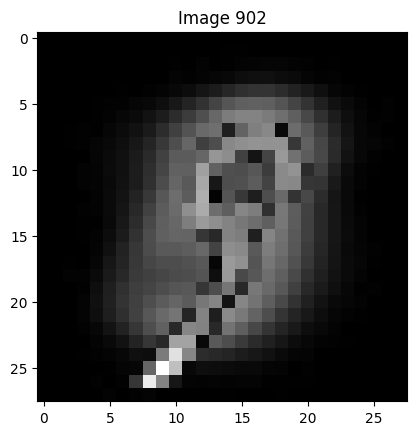

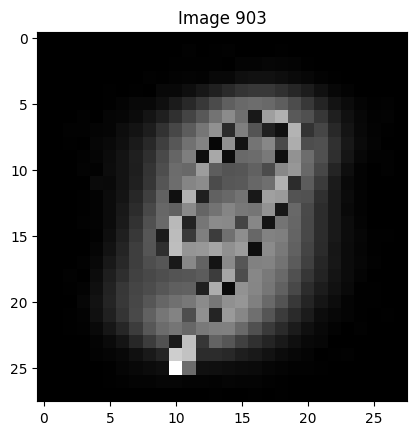

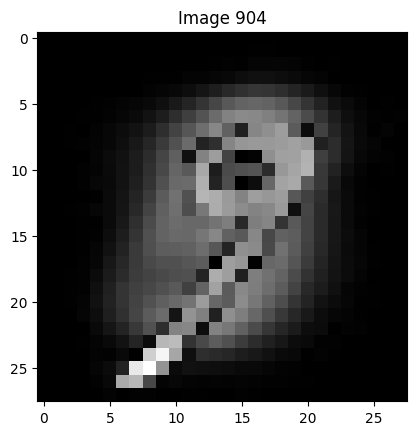

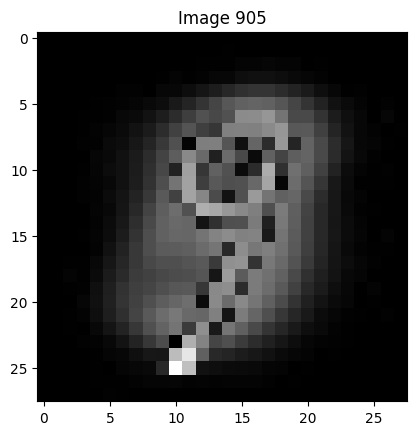

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(indices, reshaped_X):
    for i in indices:
        mean_image = reshaped_X[i]
        plt.imshow(mean_image, cmap='gray')
        plt.title(f'Image {i + 1}')
        plt.show(2)

# Assuming U, X_centered, and Y are defined correctly
U_p = U[:, :500]

# Reconstruct data using the reduced principal components
Y_p = np.dot(U_p.T, X_centered)  # Projection onto the reduced subspace
x_reconstructed = np.dot(U_p, Y_p) + X_centered.mean(axis=0)  # Reconstruction

# Reshape for plotting (assuming 28x28 images)
reshaped_X = np.abs(x_reconstructed.reshape(-1, 28, 28))  # Ensure non-negative values

# Plot images for different ranges of indices
for start_idx in range(0, 1000, 100):
    end_idx = start_idx + 5
    plot_images(range(start_idx, end_idx), reshaped_X)


In [7]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

Y_test = np.load('y_test.npy', allow_pickle=True)   # Load the y_test.npy file with allow_pickle=True
X_test = np.load('x_test.npy', allow_pickle=True).reshape(-1, 784)   # Load the x_test.npy file with allow_pickle=True   

# Define the range of p values to try
p_values = [5, 10, 20, 50, 100]

# Initialize dictionary to store accuracies for each value of p
accuracies = {}

# Create QDA classifier object
qda = QuadraticDiscriminantAnalysis()

# Loop over different values of p
for p in p_values:
    # Apply PCA on the test set to obtain reduced feature matrix Y_test
    pca = PCA(n_components=p)
    Y_test_reduced = pca.fit_transform(X_test)
    
    # Train the QDA classifier
    qda.fit(Y_test_reduced, Y_test)
    
    # Make predictions
    y_pred = qda.predict(Y_test_reduced)
    
    # Compute overall accuracy
    accuracy = np.mean(Y_test == y_pred)
    
    # Compute per-class accuracy
    class_accuracies = {}
    for class_label in range(10):
        class_indices = (Y_test == class_label)
        class_y_true = Y_test[class_indices]
        class_y_pred = y_pred[class_indices]
        class_accuracy = np.mean(class_y_true == class_y_pred)
        class_accuracies[class_label] = class_accuracy
    
    # Store accuracies for the current value of p
    accuracies[p] = {
        'overall_accuracy': accuracy,
        'per_class_accuracy': class_accuracies
    }

# Print accuracy report for all values of p
for p, acc in accuracies.items():
    print(f"\nFor p = {p}:")
    print(f"Overall Accuracy: {acc['overall_accuracy']*100:.4f}")
    print("Per-Class Accuracy:")
    for class_label, class_acc in acc['per_class_accuracy'].items():
        print(f"  Class {class_label}: {class_acc * 100:.2f}%")


ModuleNotFoundError: No module named 'sklearn'